In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [18]:
df = pd.read_csv('2021 historical climate data.csv')
df.head()

,Temp (C) -2h,Dew Point Temp (C) -2h,Rel Hum (%) -2h,Wind Dir (10s deg) -2h,Wind Spd (km/h) -2h,Visibility (km) -2h,Stn Press (kPa) -2h,Weather -2h,Temp (C) -1h,Dew Point Temp (C) -1h,Rel Hum (%) -1h,Wind Dir (10s deg) -1h,Wind Spd (km/h) -1h,Visibility (km) -1h,Stn Press (kPa) -1h,Weather -1h,Weather
0,7.2,6.9,98,8,15,12.9,101.65,True,7.3,6.9,98,9,22,4.8,101.54,True,True
1,7.3,6.9,98,9,22,4.8,101.54,True,7.5,7.0,97,8,20,12.9,101.42,True,True
2,7.5,7.0,97,8,20,12.9,101.42,True,7.7,6.7,93,8,25,12.9,101.32,True,True
3,7.7,6.7,93,8,25,12.9,101.32,True,7.5,6.6,94,9,25,16.1,101.23,True,True
4,7.5,6.6,94,9,25,16.1,101.23,True,7.6,6.6,93,8,22,16.1,101.15,True,True


In [19]:
df['Weather'].value_counts()

False    6180
True     1161
Name: Weather, dtype: int64

In [20]:
#df.hist(column='Temp (C)', bins=150)

In [21]:
df.columns

Index(['Temp (C) -2h', 'Dew Point Temp (C) -2h', 'Rel Hum (%) -2h',
       'Wind Dir (10s deg) -2h', 'Wind Spd (km/h) -2h', 'Visibility (km) -2h',
       'Stn Press (kPa) -2h', 'Weather -2h', 'Temp (C) -1h',
       'Dew Point Temp (C) -1h', 'Rel Hum (%) -1h', 'Wind Dir (10s deg) -1h',
       'Wind Spd (km/h) -1h', 'Visibility (km) -1h', 'Stn Press (kPa) -1h',
       'Weather -1h', 'Weather'],
      dtype='object')

In [22]:
X = df[["Temp (C) -2h","Dew Point Temp (C) -2h","Rel Hum (%) -2h","Wind Dir (10s deg) -2h","Wind Spd (km/h) -2h","Visibility (km) -2h",
"Stn Press (kPa) -2h","Weather -2h","Temp (C) -1h","Dew Point Temp (C) -1h","Rel Hum (%) -1h","Wind Dir (10s deg) -1h",
"Wind Spd (km/h) -1h","Visibility (km) -1h","Stn Press (kPa) -1h","Weather -1h","Weather"]] .values

X[0:5]

array([[7.2, 6.9, 98, 8, 15, 12.9, 101.65, True, 7.3, 6.9, 98, 9, 22,
        4.8, 101.54, True, True],
       [7.3, 6.9, 98, 9, 22, 4.8, 101.54, True, 7.5, 7.0, 97, 8, 20,
        12.9, 101.42, True, True],
       [7.5, 7.0, 97, 8, 20, 12.9, 101.42, True, 7.7, 6.7, 93, 8, 25,
        12.9, 101.32, True, True],
       [7.7, 6.7, 93, 8, 25, 12.9, 101.32, True, 7.5, 6.6, 94, 9, 25,
        16.1, 101.23, True, True],
       [7.5, 6.6, 94, 9, 25, 16.1, 101.23, True, 7.6, 6.6, 93, 8, 22,
        16.1, 101.15, True, True]], dtype=object)

In [23]:
y = df['Weather'].values
y[0:5]

array([ True,  True,  True,  True,  True])

In [24]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.55477536, -0.13392357,  1.2927218 , -0.91458281,  0.09244518,
        -1.71929881,  0.10097727,  2.30480451, -0.5401244 , -0.13348549,
         1.29294607, -0.80687695,  0.96509995, -2.50676205, -0.04629791,
         2.30598264,  2.3071622 ],
       [-0.54068637, -0.13392357,  1.2927218 , -0.80687695,  0.96505365,
        -2.50617712, -0.04618587,  2.30480451, -0.51196021, -0.11759786,
         1.21756572, -0.91458281,  0.71578444, -1.71974664, -0.20682989,
         2.30598264,  2.3071622 ],
       [-0.51250839, -0.11802736,  1.21734854, -0.91458281,  0.71573694,
        -1.71929881, -0.20672748,  2.30480451, -0.48379602, -0.16526074,
         0.91604431, -0.91458281,  1.3390732 , -1.71974664, -0.34060655,
         2.30598264,  2.3071622 ],
       [-0.48433041, -0.16571599,  0.91585548, -0.91458281,  1.33902871,
        -1.71929881, -0.34051216,  2.30480451, -0.51196021, -0.18114836,
         0.99142466, -0.80687695,  1.3390732 , -1.40882696, -0.46100553,
         2.30598264

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5872, 17) (5872,)
Test set: (1469, 17) (1469,)


In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [28]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([False, False, False, False, False])

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9986376021798365
Test set Accuracy:  0.9972770592239619


In [30]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.99863853, 0.99727706, 0.99795779, 0.99795779, 0.99863853,
       0.99727706, 0.99795779, 0.99795779, 0.99795779, 0.99795779,
       0.99795779, 0.99795779, 0.99795779, 0.99795779])

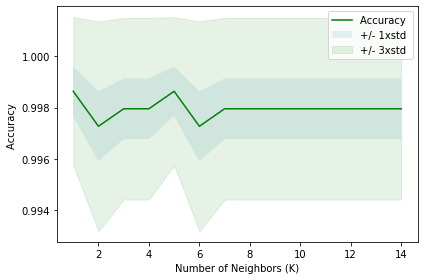

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()



In [33]:
mean_acc - 1 * std_acc

array([0.99767648, 0.99591744, 0.99677993, 0.99677993, 0.99767648,
       0.99591744, 0.99677993, 0.99677993, 0.99677993, 0.99677993,
       0.99677993, 0.99677993, 0.99677993, 0.99677993])

In [34]:
mean_acc + 1 * std_acc


array([0.99960058, 0.99863667, 0.99913566, 0.99913566, 0.99960058,
       0.99863667, 0.99913566, 0.99913566, 0.99913566, 0.99913566,
       0.99913566, 0.99913566, 0.99913566, 0.99913566])

In [35]:
mean_acc - 3 * std_acc


array([0.99575238, 0.99319821, 0.9944242 , 0.9944242 , 0.99575238,
       0.99319821, 0.9944242 , 0.9944242 , 0.9944242 , 0.9944242 ,
       0.9944242 , 0.9944242 , 0.9944242 , 0.9944242 ])

In [36]:
mean_acc + 3 * std_acc

array([1.00152468, 1.00135591, 1.00149138, 1.00149138, 1.00152468,
       1.00135591, 1.00149138, 1.00149138, 1.00149138, 1.00149138,
       1.00149138, 1.00149138, 1.00149138, 1.00149138])